In [2]:
# Credit: sentdex
# link: https://pythonprogramming.net/3d-convolutional-neural-network-machine-learning-tutorial/
import os
import pandas as pd

data_dir = 'data/demo/nodule/'
patients = os.listdir(data_dir)
labels_df = pd.read_csv('data/demo/train_data.csv',index_col=0)

labels_df.head()

,lable
name,
candidate1,1
candidate2,0
candidate3,1
candidate4,1
candidate5,0


In [3]:
len(patients)

465

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import math

[[[170 169 162 ...   7   2   3]
  [174 170 170 ...  59  20  14]
  [183 169 166 ... 146  67  19]
  ...
  [195 189 187 ...  24  28  27]
  [194 190 191 ...  17  24  33]
  [192 188 191 ...  20  25  27]]

 [[169 167 164 ...  12   5   2]
  [168 164 166 ...  53  16   5]
  [177 167 167 ... 145  75  16]
  ...
  [191 184 191 ...  21  25  26]
  [192 191 195 ...  19  24  24]
  [191 193 198 ...  17  21  23]]

 [[170 169 165 ...  14   5   1]
  [172 169 165 ...  50  10   2]
  [170 165 168 ... 145  78  22]
  ...
  [193 190 188 ...  27  25  23]
  [192 189 191 ...  25  23  20]
  [187 190 192 ...  25  25  22]]

 ...

 [[177 181 178 ...   5   3   4]
  [174 180 181 ...   4   2   4]
  [172 170 171 ...  10  11  14]
  ...
  [192 189 192 ... 185 187 189]
  [190 192 195 ... 186 187 185]
  [193 196 191 ... 189 185 185]]

 [[184 183 178 ...   3   2   2]
  [178 181 181 ...   2   4   3]
  [171 169 170 ...   7  13  10]
  ...
  [191 193 194 ... 182 182 187]
  [191 192 195 ... 185 182 182]
  [195 193 191 ... 188 184 1

/home/vivi/anaconda3/envs/3dunet/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: get_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  This is separate from the ipykernel package so we can avoid doing imports until


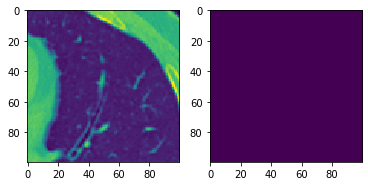

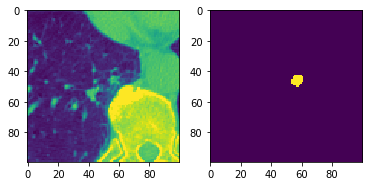

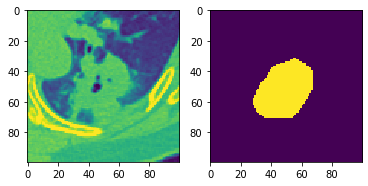

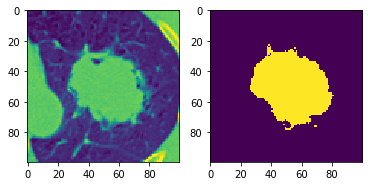

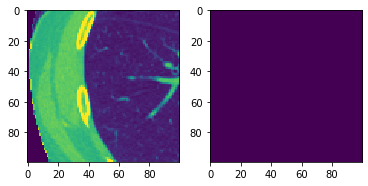

In [5]:
for patient in patients[:5]:
    patient_name = patient[0:-4]
    label = labels_df.get_value(patient_name, 'lable')
    path = data_dir + patient
    # a couple great 1-liners from: https://www.kaggle.com/gzuidhof/data-science-bowl-2017/full-preprocessing-tutorial
    scan = np.load(path)
    print(scan['voxel'],label)
    plt.figure()
    plt.subplot(1,2,1)
    plt.imshow(scan['voxel'][37])
    plt.subplot(1,2,2)
    plt.imshow(scan['seg'][37])

In [8]:
import tensorflow as tf
'''use float type in tf v1 '''
# credit: cartal
# link: https://github.com/theislab/scgen/issues/14
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior() 
import numpy as np

Instructions for updating:
non-resource variables are not supported in the long term


In [9]:
n_classes = 2
batch_size = 10

x = tf.placeholder('float')
y = tf.placeholder('float')

keep_rate = 0.8

In [10]:
def conv3d(x, W):
    return tf.nn.conv3d(x, W, strides=[1,1,1,1,1], padding='SAME')

def maxpool3d(x):
    #                        size of window         movement of window as you slide about
    return tf.nn.max_pool3d(x, ksize=[1,2,2,2,1], strides=[1,2,2,2,1], padding='SAME')

In [12]:
def convolutional_neural_network(x):
    #                # 5 x 5 x 5 patches, 1 channel, 32 features to compute.
    weights = {'W_conv1':tf.Variable(tf.random_normal([3,3,3,1,32])),
               #       5 x 5 x 5 patches, 32 channels, 64 features to compute.
               'W_conv2':tf.Variable(tf.random_normal([3,3,3,32,64])),
               #                                  64 features
               'W_fc':tf.Variable(tf.random_normal([54080,1024])),
               'out':tf.Variable(tf.random_normal([1024, n_classes]))}

    biases = {'b_conv1':tf.Variable(tf.random_normal([32])),
               'b_conv2':tf.Variable(tf.random_normal([64])),
               'b_fc':tf.Variable(tf.random_normal([1024])),
               'out':tf.Variable(tf.random_normal([n_classes]))}

        #                            image X      image Y        image Z
    x = tf.reshape(x, shape=[-1, IMG_SIZE_PX, IMG_SIZE_PX, SLICE_COUNT, 1])

    conv1 = tf.nn.relu(conv3d(x, weights['W_conv1']) + biases['b_conv1'])
    conv1 = maxpool3d(conv1)


    conv2 = tf.nn.relu(conv3d(conv1, weights['W_conv2']) + biases['b_conv2'])
    conv2 = maxpool3d(conv2)

    fc = tf.reshape(conv2,[-1, 54080])
    fc = tf.nn.relu(tf.matmul(fc, weights['W_fc'])+biases['b_fc'])
    fc = tf.nn.dropout(fc, keep_rate)

    output = tf.matmul(fc, weights['out'])+biases['out']

    return output


In [ ]:
much_data = np.load('muchdata-50-50-20.npy')
# If you are working with the basic sample data, use maybe 2 instead of 100 here... you don't have enough data to really do this
train_data = much_data[:-100]
validation_data = much_data[-100:]

def train_neural_network(x):
    prediction = convolutional_neural_network(x)
    cost = tf.reduce_mean( tf.nn.softmax_cross_entropy_with_logits(prediction,y) )
    optimizer = tf.train.AdamOptimizer(learning_rate=1e-5).minimize(cost)
    
    hm_epochs = 1
    with tf.Session() as sess:
        sess.run(tf.initialize_all_variables())
        
        successful_runs = 0
        total_runs = 0
        
        for epoch in range(hm_epochs):
            for data in train_data:
                total_runs += 1
                try:
                    epoch_loss = 0
                    X = data[0]
                    Y = data[1]
                    #print(Y)
                    _, c = sess.run([optimizer, cost], feed_dict={x: X, y: Y})
                    epoch_loss += c
                    successful_run += 1
                except Exception as e:
                    pass
                    #print(str(e))
            
            print('Epoch', epoch+1, 'completed out of',hm_epochs,'loss:',epoch_loss)

            correct = tf.equal(tf.argmax(prediction, 1), tf.argmax(y, 1))
            accuracy = tf.reduce_mean(tf.cast(correct, 'float'))

            print('Accuracy:',accuracy.eval({x:[i[0] for i in validation_data], y:[i[1] for i in validation_data]}))
            
        print('Done. Finishing accuracy:')
        print('Accuracy:',accuracy.eval({x:[i[0] for i in validation_data], y:[i[1] for i in validation_data]}))
        
        print('fitment percent:',successful_runs/total_runs)


train_neural_network(x)